# Lab10 : Implementation of Learning Algorithms for an Application

<div style="text-align: right">
<font size="+0.3">-Shreyas Raorane</font><br>
<font size="+0.3">-RA1811028010016</font>
</div>

1. Implementation of Linear Regression algorithm to predict students score using the given dataset. (students-score.csv)
2. Implementation of Support Vector Classification algorithm to classify the cases of breast cancer using the given dataset. (breast cancer data.csv)
3. Implementation of K-means clustering algorithm to group the customers based on their demographic detail using the given dataset. (mall customers.csv)

## Aim: To Implement various Learning algorithms for the given Data

## 10a:  Implementation of Linear Regression algorithm to predict students score using the given dataset. (students-score.csv)

### Linear Regression
    Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.

While training the model we are given : <br>
- x: input training data (univariate – one input variable(parameter))<br>
- y: labels to data (supervised learning)

When training the model – it fits the best line to predict the value of y for a given value of x. The model gets the best regression fit line by finding the best θ1 and θ2 values.<br>
- θ1: intercept <br>
- θ2: coefficient of x

Once we find the best θ1 and θ2 values, we get the best fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x.

To update θ1 and θ2 values to get the best fit line, we useL

###### Cost Function (J):
    By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum. So, it is very important to update the θ1 and θ2 values, to reach the best value that minimize the error between predicted y value (pred) and true y value (y). 
    
    Cost function(J) of Linear Regression is the Root Mean Squared Error (RMSE) between predicted y value (pred) and true y value (y).

###### Gradient Descent:
    To update θ1 and θ2 values in order to reduce Cost function (minimizing RMSE value) and achieving the best fit line the model uses Gradient Descent. The idea is to start with random θ1 and θ2 values and then iteratively updating the values, reaching minimum cost.

### Loading Libraries

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set
plt.rcParams['figure.figsize'] = (12, 8)

In [40]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualizing the Data

Text(0.5, 1.0, 'Number of Hours vs Scores')

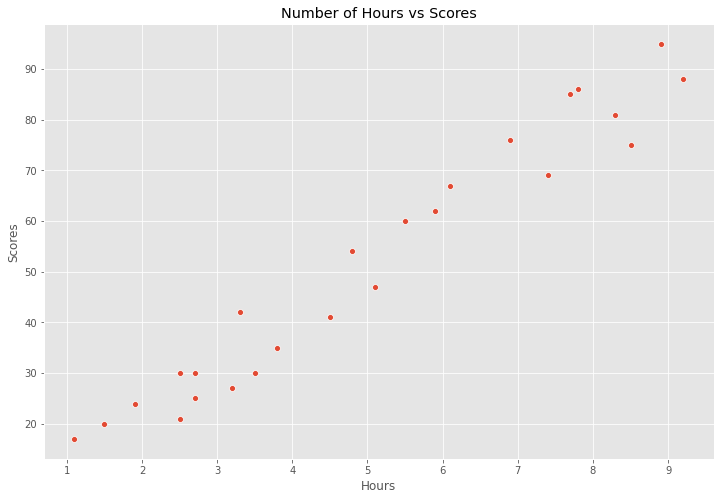

In [42]:
ax = sns.scatterplot(x='Hours', y = 'Scores', data=data)
ax.set_title("Number of Hours vs Scores")

### Computing cost function

In [43]:
##RMS value
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred-y)**2
    
    #normalization  2 is mathematical convenience, cancels out when taking derivative
    return 1/(2*m) * np.sum(error)

In [44]:
m = data.Hours.values.size
X = np.append(np.ones((m, 1)), data.Hours.values.reshape(m,1), axis=1) #add dimension for theta, theta(0) is another feature(np.ones)
y = data.Scores.values.reshape(m,1)

theta = np.zeros((2,1))

cost_function(X, y, theta)

1632.02

### Gradient Descent -- minimizing the cost function

In [45]:
#alpha => learning Rate
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha* 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [46]:
#testing --> cost functions should not increase
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0], 2)),
                               str(round(theta[1,0], 2))))

h(x) = 2.46 + 9.78x1


### visualizing the cost function -- plotting the convergence

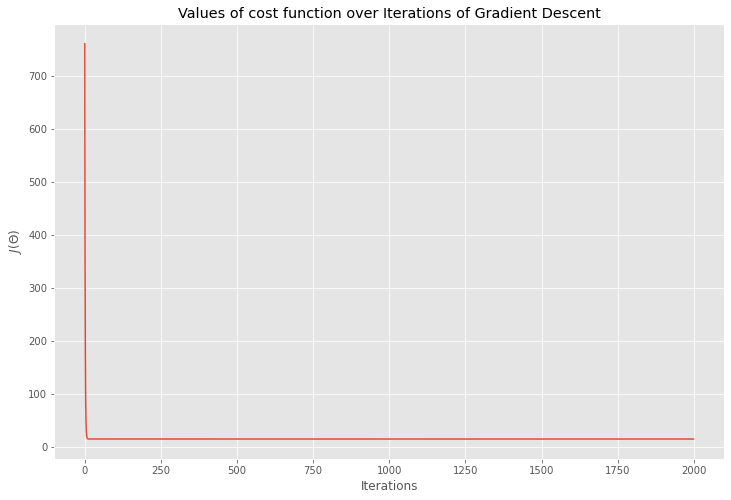

In [47]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over Iterations of Gradient Descent");

### Traning data

In [48]:
theta.shape

(2, 1)

In [49]:
theta

array([[2.46438177],
       [9.77891737]])

In [50]:
#remove dimension for matrix multiplication
theta = np.squeeze(theta)
theta.shape

(2,)

Text(0.5, 1.0, 'Linear Regression fit')

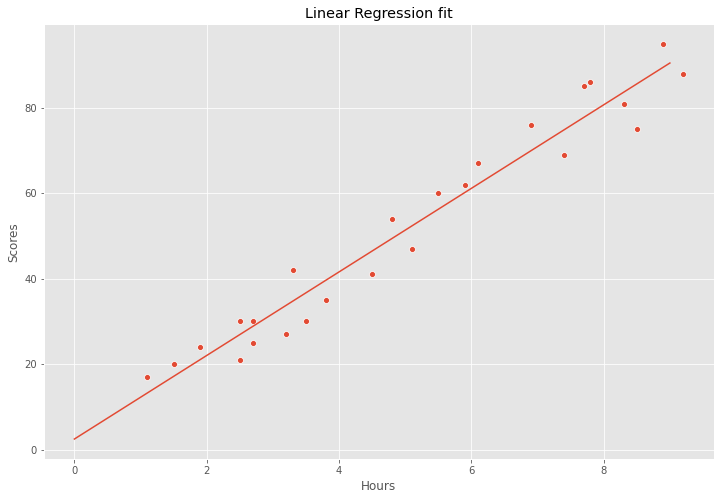

In [51]:
#plotting line over scatterplot
sns.scatterplot(x="Hours", y="Scores", data=data)

x_value = [x for x in range(0, 10)] #from the scatterplot from above
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value, y_value)

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Linear Regression fit")

### inference or prediction of values

In [52]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [53]:
y_pred_1 = predict(np.array([1,4]), theta) 
print("For 4 hours of study, the model predicts a score of: ", str(round(y_pred_1, 0)))

For 4 hours of study, the model predicts a score of:  42.0


In [54]:
y_pred_2 = predict(np.array([1,6]), theta) 
print("For 6 hours of study, the model predicts a score of: ", str(round(y_pred_2, 0)))

For 6 hours of study, the model predicts a score of:  61.0


#### User Input:

In [56]:
hrs = int(input("Enter Number of Hours in study: "))
y_pred_3 = predict(np.array([1, hrs]), theta)
print("For {} hours of study, the model predicts a score of: {}".format(str(hrs), str(round(y_pred_3, 0))))

Enter Number of Hours in study: 9
For 9 hours of study, the model predicts a score of: 90.0


## 10b: Implementation of Support Vector Classification algorithm to classify the cases of breast cancer using the given dataset. (breast cancer data.csv)

In [61]:
data_svm = pd.read_csv('breast cancer data.csv')
data_svm.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
data_svm.shape

(569, 32)

In [63]:
data_svm.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

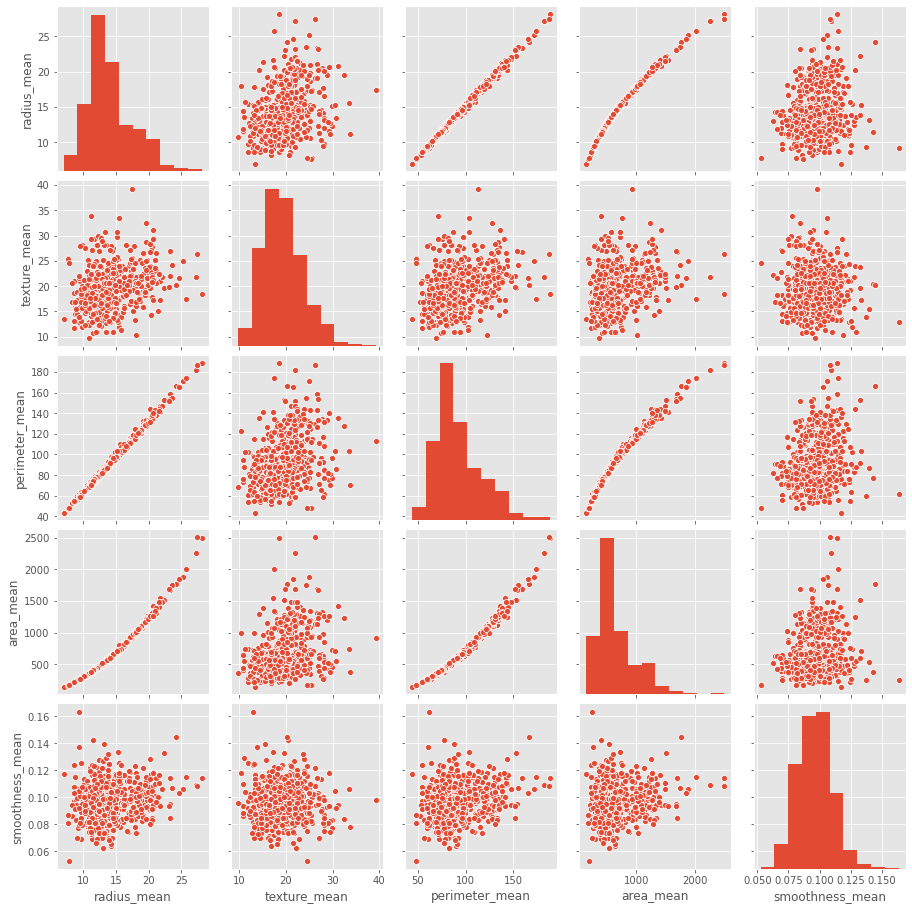

In [64]:
#plotting some variables
sns.pairplot(data_svm, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

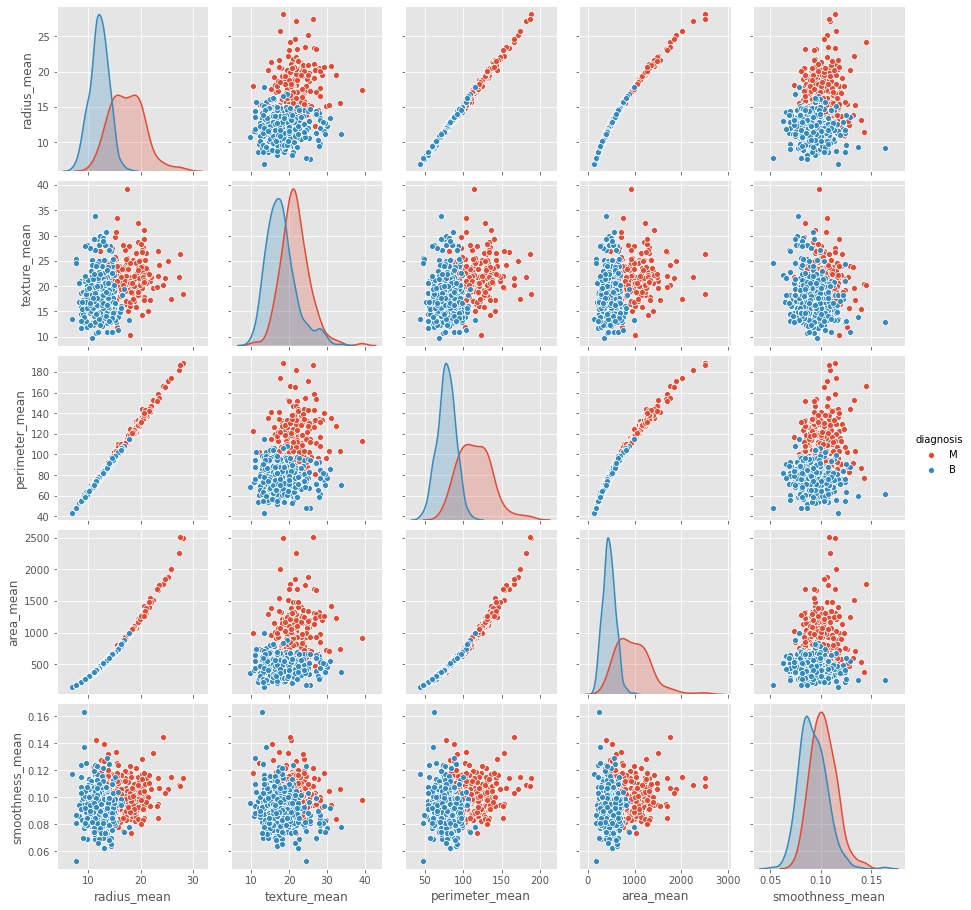

In [65]:
sns.pairplot(data_svm, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

##### Diagnosis
- M: Malignant(Cancer) Red
- B: Benign (No cancer) Blue

Calculating the M and B in our data-set

In [66]:
data_svm['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

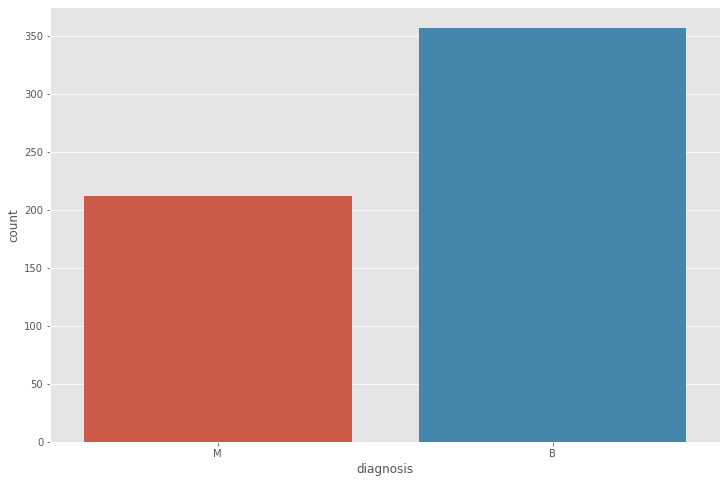

In [67]:
sns.countplot(data_svm['diagnosis'], label = 'Count')

### Heatmap to see the correlation between the features:

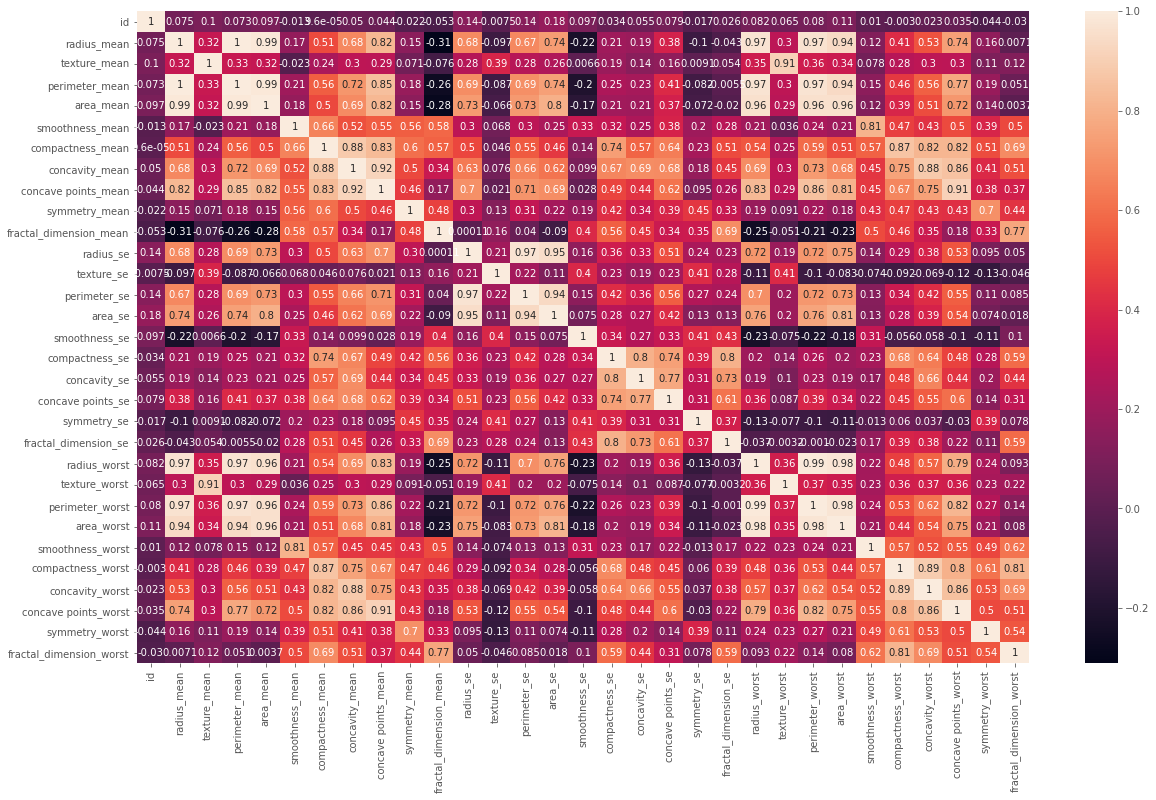

In [72]:
plt.rcParams['figure.figsize'] = (20, 12)
sns.heatmap(data_svm.corr(), annot=True)

### SVM
    A Support Vector Machine (SVM) is a binary linear classification whose decision boundary is explicitly constructed to minimize generalization error. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection.

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

###### Working of SVM
The followings are important concepts in SVM −

    Support Vectors − Datapoints that are closest to the hyperplane is called support vectors. Separating line will be defined with the help of these data points.

    Hyperplane − As we can see in the above diagram, it is a decision plane or space which is divided between a set of objects having different classes.

    Margin −  It may be defined as the gap between two lines on the closet data points of different classes. It can be calculated as the perpendicular distance from the line to the support vectors. Large margin is considered as a good margin and small margin is considered as a bad margin.


#### SVM algorithm:
    is implemented with kernel that transforms an input data space into the required form. 
    
    SVM uses a technique called the kernel trick in which kernel takes a low dimensional input space and transforms it into a higher dimensional space. 
    
    In simple words, kernel converts non-separable problems into separable problems by adding more dimensions to it. It makes SVM more powerful, flexible and accurate. The following are some of the types of kernels used by SVM.

- Linear Kernel
    It can be used as a dot product between any two observations. The formula of linear kernel is as below −
         
         K(x,xi)=sum(x∗xi)
    From the above formula, we can see that the product between two vectors say 𝑥 & 𝑥𝑖 is the sum of the multiplication of each pair of input values.
<br><br>
- Polynomial Kernel
    It is more generalized form of linear kernel and distinguish curved or nonlinear input space. Following is the formula for polynomial kernel −

        k(X,Xi)=1+sum(X∗Xi)^d
    Here d is the degree of polynomial, which we need to specify manually in the learning algorithm.
<br><br>
- Radial Basis Function (RBF) Kernel
    RBF kernel, mostly used in SVM classification, maps input space in indefinite dimensional space. Following formula explains it mathematically −

        K(x,xi)=exp(−gamma∗sum(x−xi^2))
    Here, gamma ranges from 0 to 1. We need to manually specify it in the learning algorithm. A good default value of gamma is 0.1.

As we implemented SVM for linearly separable data, we can implement it in Python for the data that is not linearly separable. It can be done by using kernels.

### Model Training
- "y" = Is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "diagnosis" is Cancer (Malignant) or not (Benign). I.e. we are going to use the "target" feature here.
- "X" = The predictors which are the remaining columns (radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, etc)

In [75]:
X = data_svm.drop(['diagnosis'], axis=1)
X = X.drop(['id'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [122]:
y = data_svm['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [123]:
di = {"M": 1, "B": 0}
y = y.replace(di)
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### Creating testing and training data

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #support vector classifier

In [125]:
#80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [126]:
print('X Training: ',X_train.shape)
print('X Testing: ',X_test.shape)

print('y Training: ',y_train.shape)
print('y Testing: ',y_test.shape)

X Training:  (455, 30)
X Testing:  (114, 30)
y Training:  (455,)
y Testing:  (114,)


In [127]:
svc_model = SVC()

In [128]:
svc_model.fit(X_train, y_train)

SVC()

In [129]:
y_predict = svc_model.predict(X_test)

#### Confusion Matrix:

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
y_test

269    0
263    1
30     1
452    0
214    1
      ..
17     1
504    0
346    0
14     1
110    0
Name: diagnosis, Length: 114, dtype: int64

In [148]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['cancer', 'healthy'], columns=['predicted_cancer', 'predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
cancer,48,0
healthy,5,61


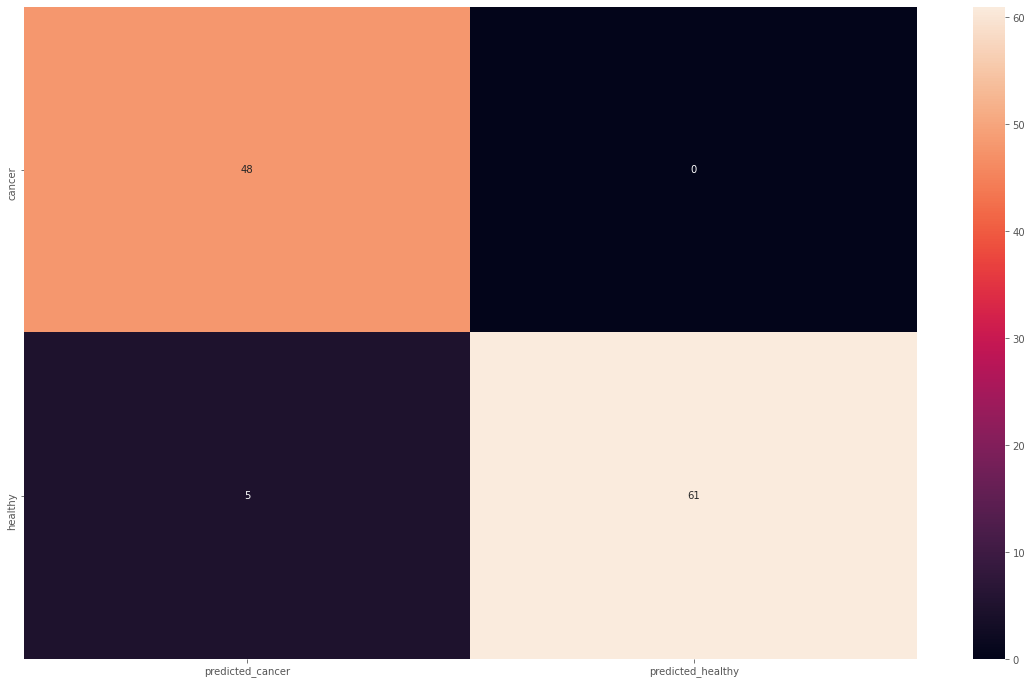

In [149]:
sns.heatmap(confusion, annot=True)

In [150]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        66
           1       0.91      1.00      0.95        48

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Normalization to Improve Model

#### Normalizing training Data

In [151]:
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = (X_train_max - X_train_min)
print(X_train_range)

radius_mean                  21.129000
texture_mean                 28.900000
perimeter_mean              144.710000
area_mean                  2357.500000
smoothness_mean               0.092070
compactness_mean              0.326020
concavity_mean                0.426800
concave points_mean           0.201200
symmetry_mean                 0.198000
fractal_dimension_mean        0.043000
radius_se                     2.761500
texture_se                    4.524800
perimeter_se                 21.223000
area_se                     535.398000
smoothness_se                 0.029417
compactness_se                0.133148
concavity_se                  0.396000
concave points_se             0.052790
symmetry_se                   0.071068
fractal_dimension_se          0.028945
radius_worst                 28.110000
texture_worst                37.050000
perimeter_worst             200.790000
area_worst                 4068.800000
smoothness_worst              0.151430
compactness_worst        

In [152]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.606702,0.386851,0.593670,0.460870,0.447486,0.341145,0.298032,0.431958,0.522222,0.136047,...,0.633227,0.435897,0.597091,0.448240,0.423496,0.287384,0.288898,0.625430,0.357567,0.180441
223,0.415022,0.341522,0.406399,0.262057,0.541653,0.309858,0.268744,0.321173,0.441919,0.303953,...,0.413732,0.480432,0.375965,0.221884,0.554910,0.408175,0.317572,0.508247,0.576859,0.336875
271,0.203938,0.092042,0.196531,0.103712,0.496470,0.173916,0.076500,0.136928,0.358081,0.296279,...,0.156172,0.099595,0.138752,0.066924,0.426798,0.119733,0.101837,0.300687,0.277501,0.165158
474,0.184533,0.181315,0.183954,0.091368,0.522103,0.268450,0.119845,0.078082,0.404545,0.428140,...,0.142654,0.185155,0.151253,0.060927,0.409628,0.351709,0.268770,0.273746,0.241388,0.347370


#### Normalizing Testing Data

In [153]:
X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_range = (X_test_max - X_test_min)
X_test_scaled = (X_test - X_test_min)/X_test_range

In [154]:
svc_model.fit(X_train_scaled, y_train)

SVC()

In [155]:
y_predict = svc_model.predict(X_test_scaled)

In [156]:
cm = confusion_matrix(y_test, y_predict)

In [158]:
confusion = pd.DataFrame(cm, index=['cancer', 'healthy'], columns=['predicted_cancer', 'predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
cancer,61,5
healthy,0,48


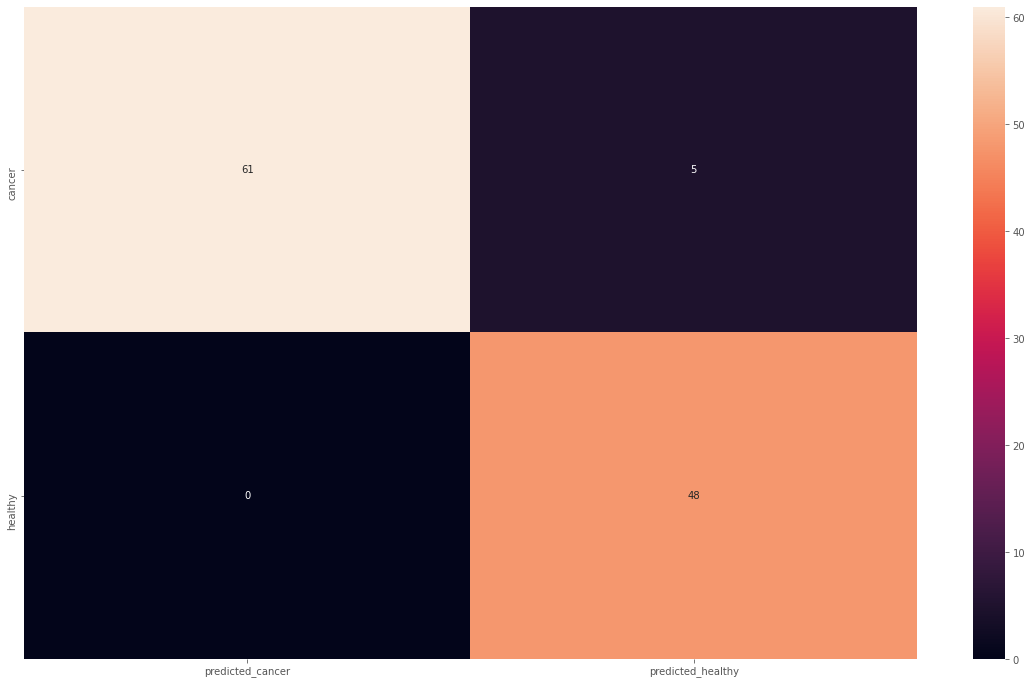

In [159]:
sns.heatmap(confusion, annot=True)

In [161]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        66
           1       0.91      1.00      0.95        48

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## 10c: Implementation of K-means clustering algorithm to group the customers based on their demographic detail using the given dataset. (mall customers.csv)

### Kmeans Algorithm
    Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 
    It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. 
    It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. 
    The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

##### The way kmeans algorithm works is as follows:
- Specify number of clusters K.
    Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
- Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
- Compute the sum of the squared distance between data points and all centroids.
- Assign each data point to the closest cluster (centroid).
- Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

The approach kmeans follows to solve the problem is called Expectation-Maximization. 
    - The E-step is assigning the data points to the closest cluster. 
    - The M-step is computing the centroid of each cluster.

In [169]:
data_kmeans = pd.read_csv('Mall_Customers.csv')
data_kmeans.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


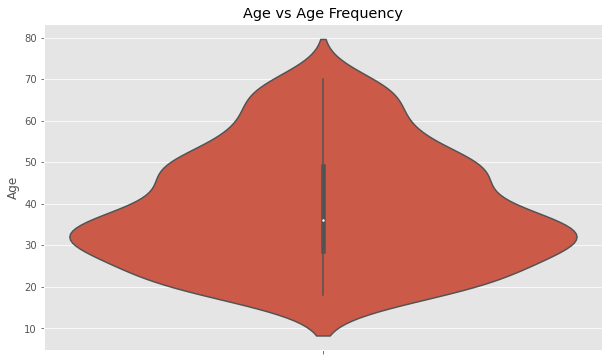

In [170]:
data_kmeans.drop(["CustomerID"], axis=1, inplace=True)

plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Age vs Age Frequency')

sns.violinplot(y=data_kmeans["Age"])
plt.show()

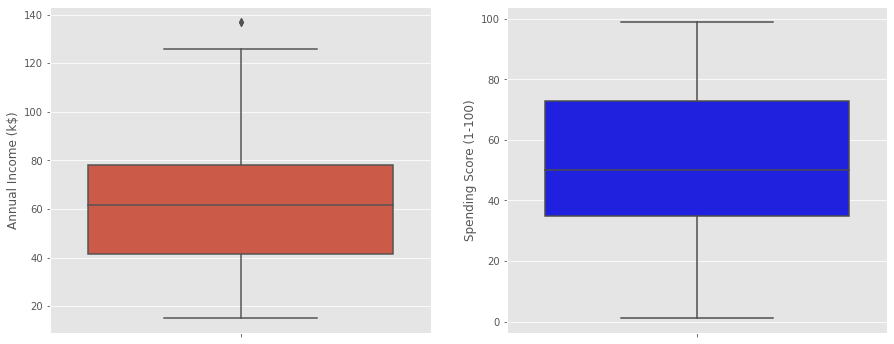

In [176]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1,2,1)
sns.boxplot(y=data_kmeans["Annual Income (k$)"])
plt.subplot(1,2,2)
sns.boxplot(y=data_kmeans["Spending Score (1-100)"], color="blue")

###### Genderwise distribution

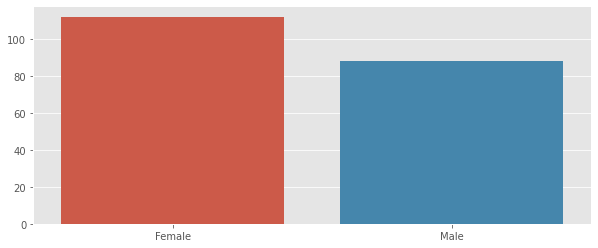

In [177]:
genders = data_kmeans.Genre.value_counts()
plt.rcParams['figure.figsize'] = (10, 4)
sns.barplot(x=genders.index, y=genders.values)

###### Agewise distribution

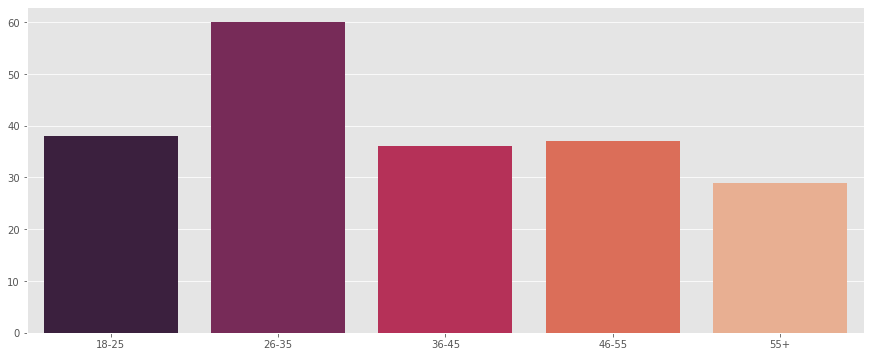

In [185]:
age18_25 = data_kmeans.Age[(data_kmeans.Age<=25) & (data_kmeans.Age>=18)]
age26_35 = data_kmeans.Age[(data_kmeans.Age<=35) & (data_kmeans.Age>=26)]
age36_45 = data_kmeans.Age[(data_kmeans.Age<=45) & (data_kmeans.Age>=36)]
age46_55 = data_kmeans.Age[(data_kmeans.Age<=55) & (data_kmeans.Age>=46)]
age55up = data_kmeans.Age[(data_kmeans.Age>=56)]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values),len(age55up.values)]

plt.rcParams['figure.figsize'] = (15, 6)
sns.barplot(x=x, y=y, palette="rocket")

###### Based on Annual Income

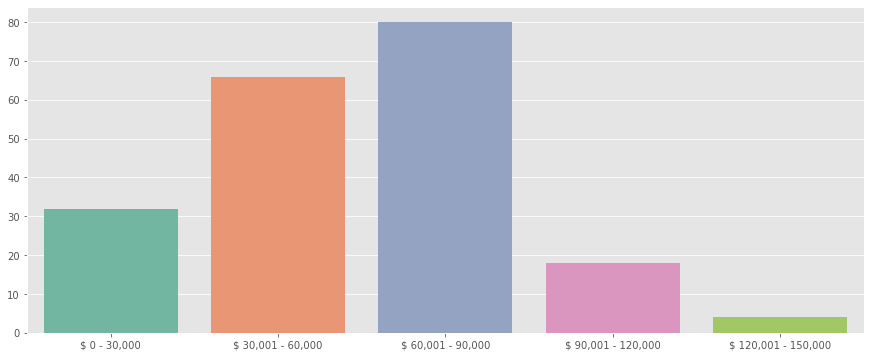

In [187]:
ai0_30 = data_kmeans["Annual Income (k$)"][(data_kmeans["Annual Income (k$)"] >= 0) & (data_kmeans["Annual Income (k$)"] <= 30)]
ai31_60 = data_kmeans["Annual Income (k$)"][(data_kmeans["Annual Income (k$)"] >= 31) & (data_kmeans["Annual Income (k$)"] <= 60)]
ai61_90 = data_kmeans["Annual Income (k$)"][(data_kmeans["Annual Income (k$)"] >= 61) & (data_kmeans["Annual Income (k$)"] <= 90)]
ai91_120 = data_kmeans["Annual Income (k$)"][(data_kmeans["Annual Income (k$)"] >= 91) & (data_kmeans["Annual Income (k$)"] <= 120)]
ai121_150 = data_kmeans["Annual Income (k$)"][(data_kmeans["Annual Income (k$)"] >= 121) & (data_kmeans["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

sns.barplot(x=aix, y=aiy, palette="Set2")

###### Based on Spending Score

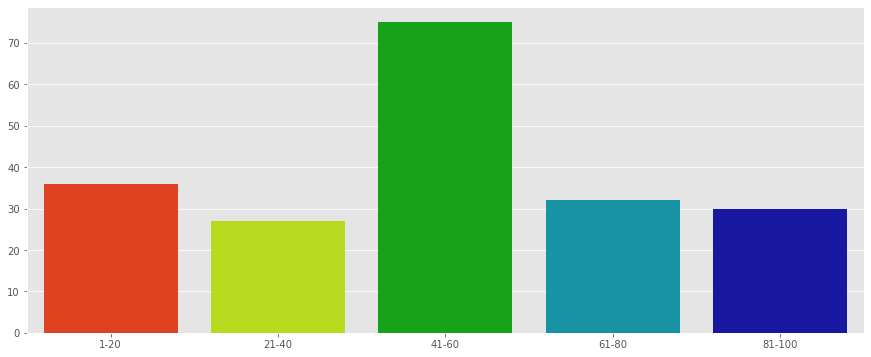

In [186]:
ss1_20 = data_kmeans["Spending Score (1-100)"][(data_kmeans["Spending Score (1-100)"] >= 1) & (data_kmeans["Spending Score (1-100)"] <= 20)]
ss21_40 = data_kmeans["Spending Score (1-100)"][(data_kmeans["Spending Score (1-100)"] >= 21) & (data_kmeans["Spending Score (1-100)"] <= 40)]
ss41_60 = data_kmeans["Spending Score (1-100)"][(data_kmeans["Spending Score (1-100)"] >= 41) & (data_kmeans["Spending Score (1-100)"] <= 60)]
ss61_80 = data_kmeans["Spending Score (1-100)"][(data_kmeans["Spending Score (1-100)"] >= 61) & (data_kmeans["Spending Score (1-100)"] <= 80)]
ss81_100 = data_kmeans["Spending Score (1-100)"][(data_kmeans["Spending Score (1-100)"] >= 81) & (data_kmeans["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")

#### Getting Optimal K Value - WCSS vs K-values plot

In [188]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

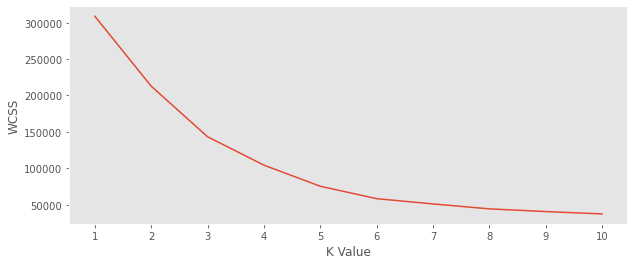

In [191]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data_kmeans.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (10, 4)
plt.grid()
plt.plot(range(1,11), wcss)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

Graphs bend at 5, by the elbow method, the k value is 5

### 3D plot

In [200]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data_kmeans.iloc[:,1:])
data_kmeans["label"] = clusters

In [201]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Spending Score (1-100)')

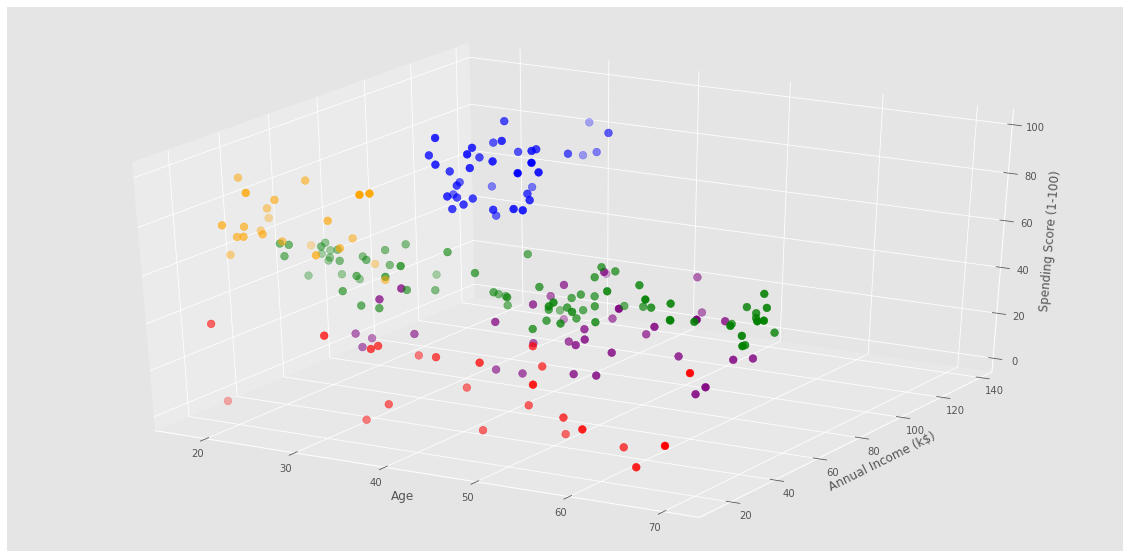

In [204]:
fig = plt.rcParams['figure.figsize'] = (20, 10)
ax = plt.subplot(111, projection='3d')
ax.scatter(data_kmeans.Age[data_kmeans.label == 0], data_kmeans["Annual Income (k$)"][data_kmeans.label == 0], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 0], c='red', s=60)
ax.scatter(data_kmeans.Age[data_kmeans.label == 1], data_kmeans["Annual Income (k$)"][data_kmeans.label == 1], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 1], c='blue', s=60)
ax.scatter(data_kmeans.Age[data_kmeans.label == 2], data_kmeans["Annual Income (k$)"][data_kmeans.label == 2], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 2], c='green', s=60)
ax.scatter(data_kmeans.Age[data_kmeans.label == 3], data_kmeans["Annual Income (k$)"][data_kmeans.label == 3], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 3], c='orange', s=60)
ax.scatter(data_kmeans.Age[data_kmeans.label == 4], data_kmeans["Annual Income (k$)"][data_kmeans.label == 4], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 4], c='purple', s=60)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

In [208]:
kmeans.labels_

array([9, 3, 9, 3, 9, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 9, 3, 4, 3, 9, 3,
       4, 3, 4, 3, 9, 3, 9, 3, 4, 3, 4, 3, 4, 3, 4, 3, 9, 3, 8, 3, 9, 3,
       9, 3, 8, 7, 9, 9, 8, 7, 7, 8, 8, 0, 8, 8, 7, 8, 8, 7, 8, 8, 8, 7,
       0, 8, 7, 7, 8, 0, 8, 8, 8, 7, 0, 0, 7, 0, 8, 0, 8, 0, 7, 0, 8, 7,
       7, 0, 8, 7, 0, 0, 7, 7, 0, 7, 0, 7, 7, 0, 8, 7, 0, 7, 8, 0, 8, 8,
       8, 7, 0, 7, 7, 7, 8, 0, 0, 0, 7, 0, 0, 1, 7, 1, 0, 1, 6, 1, 6, 1,
       7, 1, 6, 1, 6, 1, 6, 1, 6, 1, 7, 1, 6, 1, 0, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 0, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5])

##### user input

Enter Age: 50
Enter Annual Income: 50
Enter spending score: 50


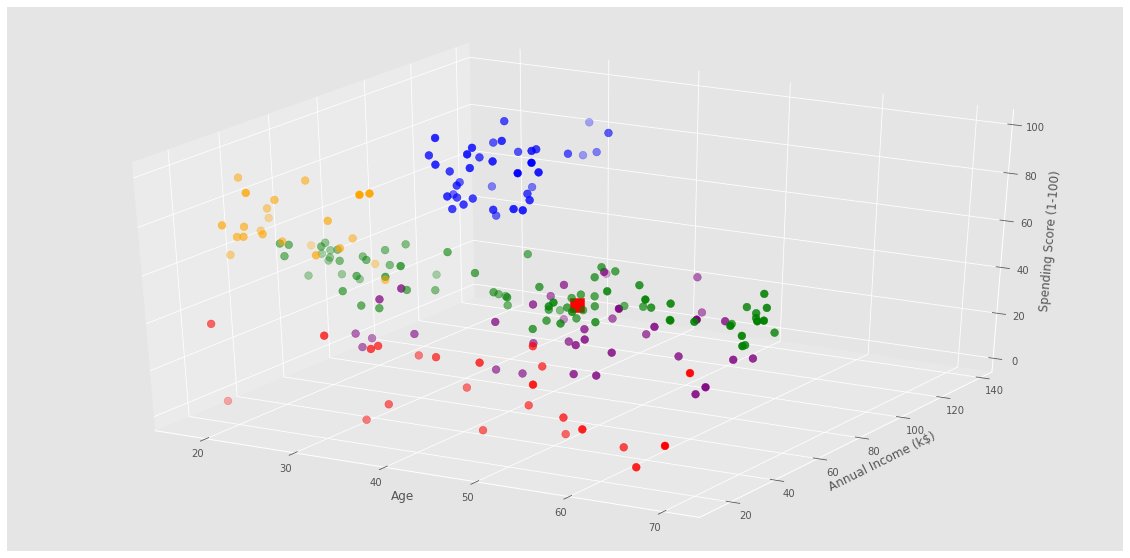

In [218]:
fig = plt.rcParams['figure.figsize'] = (20, 10)
ax = plt.subplot(111, projection='3d')
ax.scatter(data_kmeans.Age[data_kmeans.label == 0], data_kmeans["Annual Income (k$)"][data_kmeans.label == 0], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 0], c='red', s=60)
ax.scatter(data_kmeans.Age[data_kmeans.label == 1], data_kmeans["Annual Income (k$)"][data_kmeans.label == 1], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 1], c='blue', s=60)
ax.scatter(data_kmeans.Age[data_kmeans.label == 2], data_kmeans["Annual Income (k$)"][data_kmeans.label == 2], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 2], c='green', s=60)
ax.scatter(data_kmeans.Age[data_kmeans.label == 3], data_kmeans["Annual Income (k$)"][data_kmeans.label == 3], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 3], c='orange', s=60)
ax.scatter(data_kmeans.Age[data_kmeans.label == 4], data_kmeans["Annual Income (k$)"][data_kmeans.label == 4], data_kmeans["Spending Score (1-100)"][data_kmeans.label == 4], c='purple', s=60)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

user_Age = float(input('Enter Age: '))
user_Annual_income = float(input('Enter Annual Income: '))
user_spending_score = float(input('Enter spending score: '))
ax.scatter(user_Age, user_Annual_income,user_spending_score, s=200, c='red', marker = 's')

## Result: 

### Successfully Implemented the Linear Regression, Support Vector Classifier and k-means clustering Learning Models in Machine Learning for the given Datasets